#**Linearly Non-separable Data**

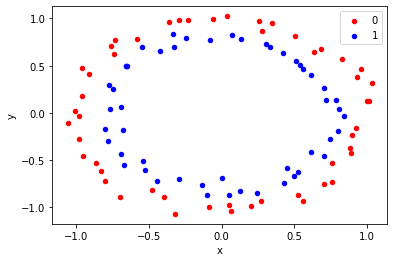

In [0]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


<a href="https://ibb.co/SvKN70s"><img src="https://i.ibb.co/VBvVpDj/Non-linear-kernel.jpg" alt="Non-linear-kernel" border="0" width="60%"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

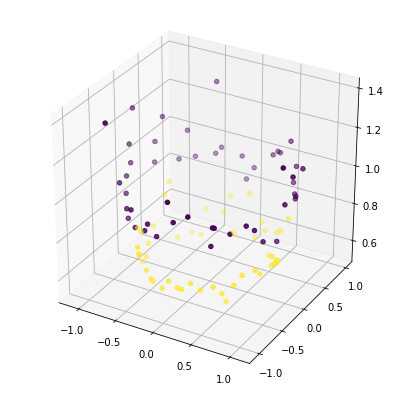

In [0]:
X1 = X[:, 0].reshape((-1, 1))           ## reshape(-1,1) convert 1 dim into 2 dim
X2 = X[:, 1].reshape((-1, 1))           
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 
  
# visualizing data in higher dimension 
fig = plt.figure(figsize=(7,7)) 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True) 
plt.show() 



---


Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable.
These features can be exponential, polynomial, trignometric or any other function of actual input features.
For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2).
Here you need to think of which hand-crafted features can be best suited for data given to you.
Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'.


---



In [0]:
#####################################
def Gaussian_kernel3d(x, mean1, mean2, mean3,  var1, var2, var3 ):
  num_fetures=3
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    F[i,0] = np.exp(-(((x[i,0]-mean1[0])**2) + ((x[i,1]-mean1[1])**2))/(var1))
    F[i,1] = np.exp(-(((x[i,0]-mean2[0])**2) + ((x[i,1]-mean2[1])**2))/(var2))
    F[i,1] = np.exp(-(((x[i,0]-mean3[0])**2) + ((x[i,1]-mean3[1])**2))/(var3))
           
  return F
#####################################

In [0]:
###################################
X = X
Y = y
F = Gaussian_kernel3d(X, np.array([0.0,0.0]), np.array([0.0,0.0]),np.array([0.75,0.75]), 0.7, 1.0, 0.5 )

#Run SVM Classifier
w = svm_function(F, Y, 10000, 0.01)


###################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]




---


Visualize the data points in the new feature space if possible.


---



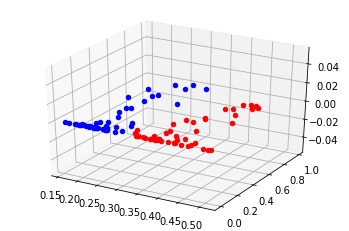

In [0]:
# This import registers the 3D projection
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
#Visualizing the above data
for x, y,z, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y,z, c=clr)

